**Realiser Par: GHAOURI Zouhair & MORAD MAROUAN**

Ce code utilise la bibliothèque google.colab pour monter Google Drive dans l'environnement Colab. Ensuite, il importe la bibliothèque pandas pour la manipulation des données. Le chemin d'accès au fichier CSV est spécifié dans la variable path_to_your_file, puis les données sont chargées à partir de ce fichier dans un DataFrame à l'aide de la fonction pd.read_csv(). Enfin, les cinq premières lignes du DataFrame sont imprimées pour vérifier que les données sont correctement chargées.

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Remplacez 'path_to_your_file' par le chemin d'accès complet à votre fichier
path_to_your_file = '/content/drive/My Drive/ADdisney/disney.csv'
data = pd.read_csv(path_to_your_file)

# Affichage des premières lignes pour vérifier que les données sont chargées correctement
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale   

Ce code utilise les bibliothèques seaborn et matplotlib.pyplot pour la visualisation des données. Tout d'abord, il divise les données de la colonne 'listed_in' en catégories individuelles, puis compte le nombre d'occurrences de chaque catégorie. Ensuite, il sélectionne les cinq catégories les plus fréquentes. Un graphique à barres est ensuite créé pour représenter visuellement ces catégories et leurs fréquences respectives. Le code peut également inclure une étape pour supprimer les lignes contenant des valeurs manquantes dans la colonne 'listed_in', mais cette étape est actuellement commentée.




listed_in
Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Name: count, dtype: int64


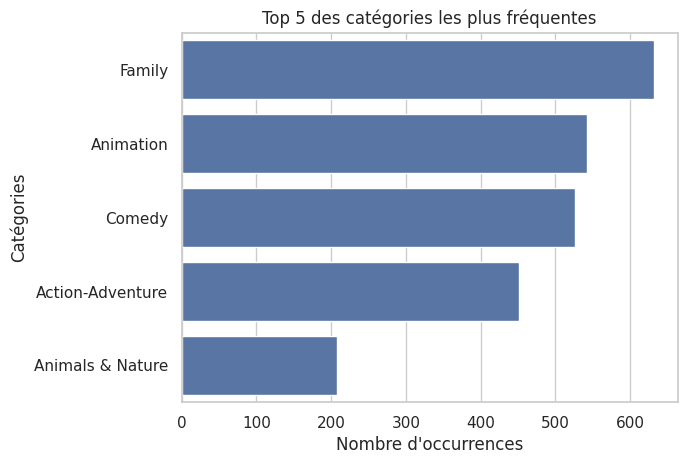

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppression des lignes avec des données manquantes dans la colonne listed_in
#data = data.dropna(subset=['listed_in'])

categories = data['listed_in'].str.split(', ').explode()
top_categories = categories.value_counts().head(5)

print(top_categories)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 des catégories les plus fréquentes')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Catégories')
plt.show()


Ce code effectue une analyse similaire à celle précédente, mais cette fois-ci sur la colonne 'director' pour trouver les réalisateurs les plus fréquents. Les cinq principaux réalisateurs sont identifiés et leurs fréquences sont comptées. Ensuite, un graphique à barres est créé pour représenter visuellement ces réalisateurs et le nombre de films/séries qu'ils ont dirigés. Les lignes de code pour supprimer les lignes avec des données manquantes dans la colonne 'director' sont actuellement commentées.

<ipython-input-13-fb5ac6653e89>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-fb5ac6653e89>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



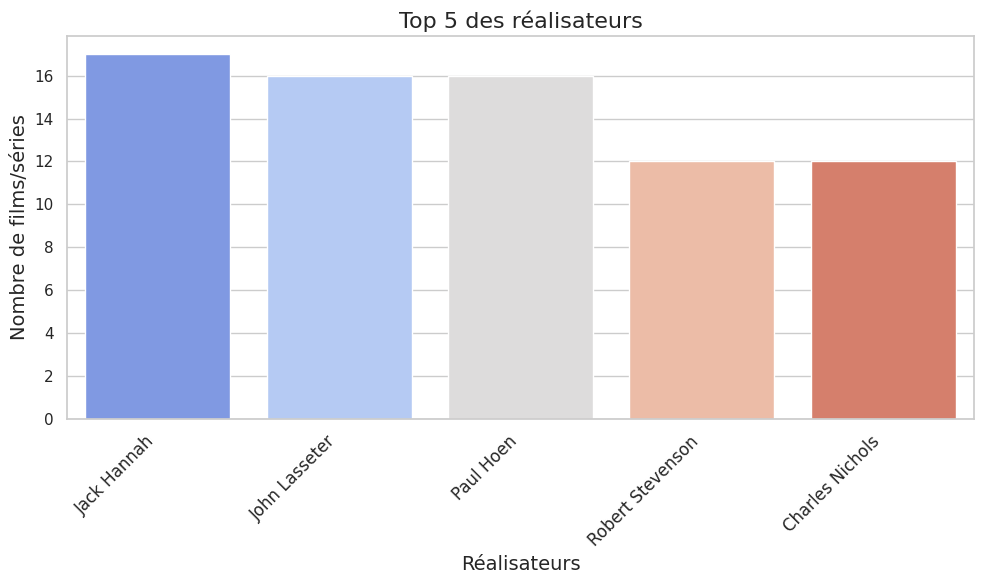

In [13]:
# Suppression des lignes avec des données manquantes dans la colonne 'director'
#data = data.dropna(subset=['director'])


top_directors = data['director'].value_counts().head(5)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')

# Ajout du titre et des étiquettes des axes
plt.title('Top 5 des réalisateurs', fontsize=16)
plt.xlabel('Réalisateurs', fontsize=14)
plt.ylabel('Nombre de films/séries', fontsize=14)

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

# Affichage
plt.tight_layout()
plt.show()


Ce dernier bloc de code poursuit l'analyse des données en se concentrant sur la colonne 'cast' pour identifier les acteurs les plus fréquents. Les lignes contenant des données manquantes dans la colonne 'cast' sont supprimées, puis les noms d'acteurs sont séparés dans une nouvelle colonne 'actors'. Ensuite, la liste des acteurs est "explosée" pour que chaque acteur ait sa propre ligne dans le DataFrame. Les occurrences de chaque acteur sont comptées, et les dix acteurs les plus fréquents sont sélectionnés. Enfin, un graphique à barres est créé pour représenter visuellement ces acteurs et leur fréquence d'apparition.

<ipython-input-14-f422c8ffff7a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-f422c8ffff7a>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




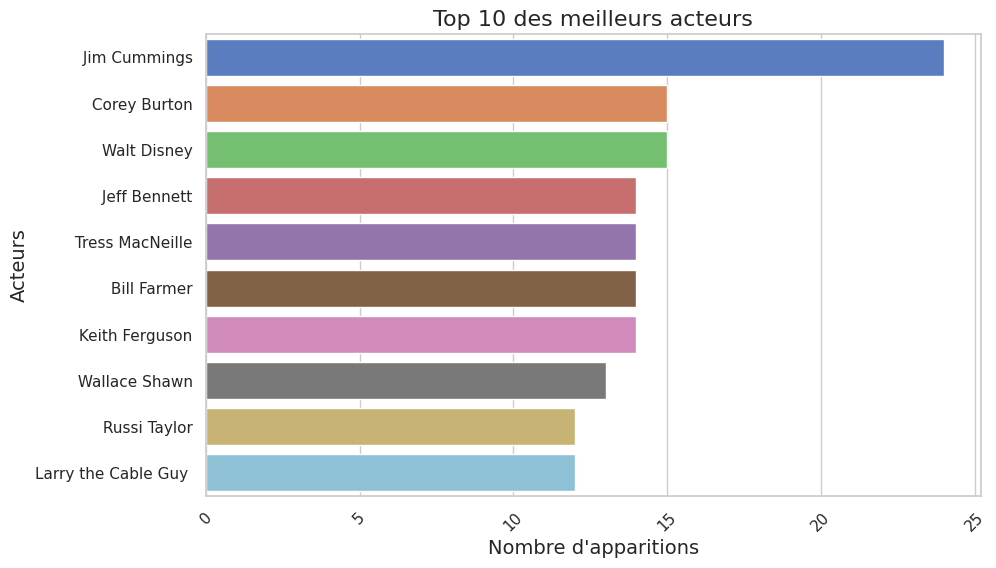

In [14]:
data = data.dropna(subset=['cast'])

data['actors'] = data['cast'].str.split(',')

data_exploded = data.explode('actors')

top_actors = data_exploded['actors'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='muted')
plt.title('Top 10 des meilleurs acteurs', fontsize=16)
plt.xlabel('Nombre d\'apparitions', fontsize=14)
plt.ylabel('Acteurs', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Ce code finalise l'analyse en se concentrant sur les séries télévisées. Les lignes contenant des données manquantes dans la colonne 'duration' sont supprimées, puis seules les entrées correspondant à des séries télévisées sont conservées. Le nombre de saisons est extrait de la colonne 'duration' et converti en format numérique. Ensuite, les séries sont triées par nombre de saisons, et les cinq séries avec le plus grand nombre de saisons sont sélectionnées. Un graphique à barres est ensuite créé pour représenter visuellement ces séries et leur nombre de saisons respectif.


<ipython-input-15-497e1e3b5301>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-497e1e3b5301>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




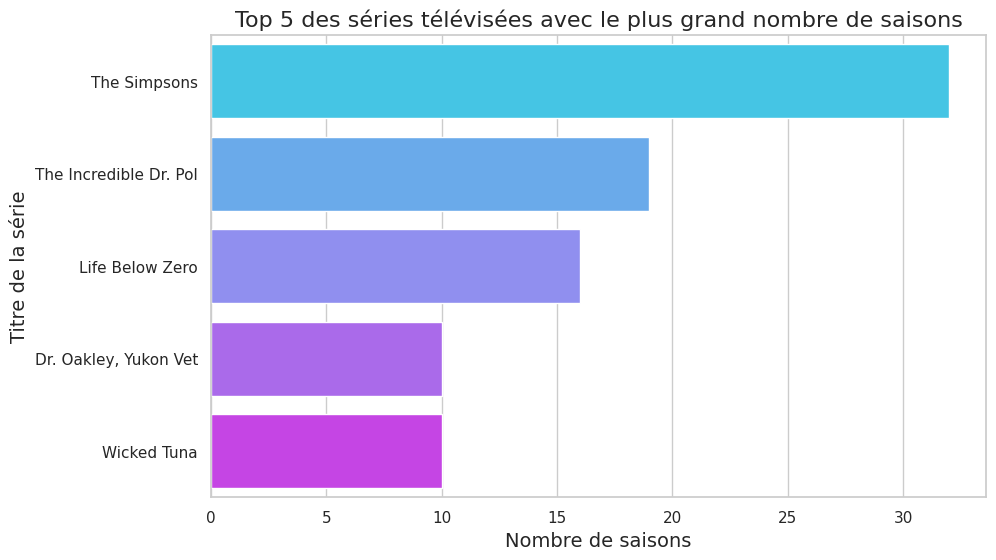

In [15]:
# Suppression des lignes avec des données manquantes dans la colonne 'duration'
#data = data.dropna(subset=['duration'])

tv_shows = data[data['type'] == 'TV Show']

tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)

top_tv_shows = tv_shows.sort_values(by='num_seasons', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons', fontsize=16)
plt.xlabel('Nombre de saisons', fontsize=14)
plt.ylabel('Titre de la série', fontsize=14)
plt.show()


Ce bloc de code utilise la bibliothèque scikit-learn pour effectuer une analyse de similarité de texte basée sur TF-IDF (Term Frequency-Inverse Document Frequency). Tout d'abord, les lignes contenant des données manquantes dans la colonne 'description' peuvent être supprimées, mais cette étape est actuellement commentée. Ensuite, la classe TfidfVectorizer est utilisée pour convertir les descriptions de contenu en une matrice TF-IDF. En utilisant cette matrice, la similarité cosinus entre chaque paire de descriptions est calculée.

La fonction get_recommendations prend un titre de contenu en entrée et utilise la similarité cosinus pour trouver les titres les plus similaires. Elle renvoie les cinq titres les plus similaires (à l'exclusion du titre d'entrée). Dans cet exemple, elle prend "Duck the Halls: A Mickey Mouse Christmas Special" comme titre d'entrée et renvoie les cinq titres les plus similaires.








In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Suppression des lignes avec des données manquantes dans la colonne 'description'
#data = data.dropna(subset=['description'])
# TF-IDF des descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].dropna()) #en cas d'utilisation du supression en haut ici on met: tfidf_matrix = tfidf.fit_transform(data['description'])

# Calcul de la matrice de similarité cosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data.index[data['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar contents
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Exemple d'utilisation
print(get_recommendations('Duck the Halls: A Mickey Mouse Christmas Special'))


1073           Mickey's Birthday Party
385               Toy Story of Terror!
1076    Mickey's Once Upon a Christmas
1378                       Toy Story 2
934                   Hawaiian Holiday
Name: title, dtype: object


Ce dernier bloc de code crée un graphique à barres empilées pour visualiser l'évolution de la production de films et de séries Disney par année. Tout d'abord, il convertit la colonne 'date_added' en format de date et extrait l'année dans une nouvelle colonne 'year_added'. Ensuite, il regroupe les données par année et type de contenu (film ou série) et compte le nombre de titres dans chaque catégorie. Ces données sont ensuite utilisées pour créer un graphique à barres empilées où chaque barre représente une année et est divisée en segments correspondant au nombre de films et de séries ajoutés cette année. Le code utilise une palette de couleurs pour différencier les films (noir) et les séries (rouge). Enfin, il ajoute des titres aux axes et affiche le graphique.

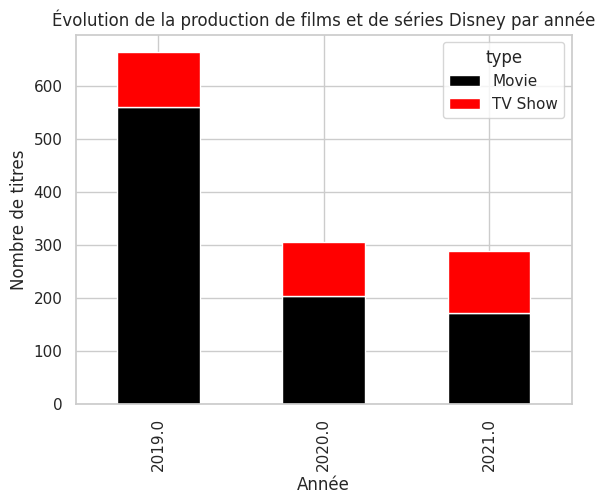

In [ ]:
data['year_added'] = pd.to_datetime(data['date_added']).dt.year


type_counts = data.groupby(['year_added', 'type']).size().unstack().fillna(0)

colors = ['#000000', '#FF0000']

type_counts.plot(kind='bar', stacked=True, color=colors)


plt.title('Évolution de la production de films et de séries Disney par année')
plt.xlabel('Année')
plt.ylabel('Nombre de titres')

plt.show()


In [8]:
import plotly.express as px

#find the number of movies and tv shows

Ce morceau de code crée un graphique en secteurs pour visualiser la répartition du nombre de films et de séries télévisées dans les données Disney. Il utilise Plotly Express (représenté par px) pour générer le graphique. Les valeurs et les noms des sections du graphique sont respectivement extraites de la série counts et de son index. La palette de couleurs utilisée (disney_palette) est spécifiée avec le noir pour les films et le rouge pour les séries. Les pourcentages de chaque section sont affichés à l'intérieur du secteur correspondant, ainsi que les étiquettes. Le titre du graphique est également ajouté avant d'afficher le graphique avec fig.show().

In [9]:
disney_palette = ['#000000', '#FF0000']

counts = data['type'].value_counts()

fig = px.pie(values=counts, names=counts.index, color_discrete_sequence=disney_palette)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Nombre de films et de séries télévisées')

fig.show()


<Axes: title={'center': 'Daily Global Streams of Popular Series from 194O to 2020'}>

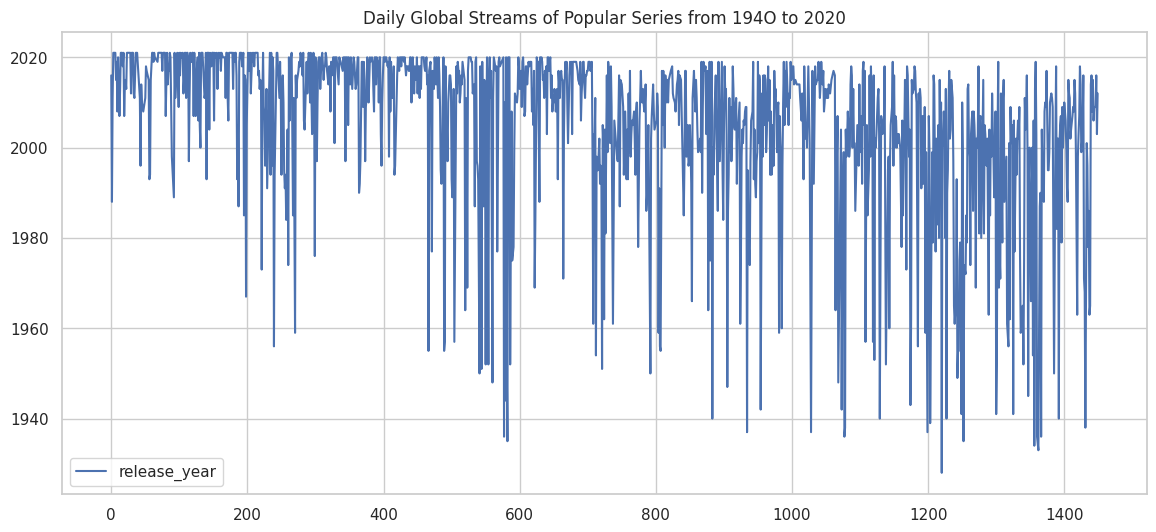

In [10]:
plt.figure(figsize=(14,6))

plt.title("Daily Global Streams of Popular Series from 194O to 2020")

sns.lineplot(data=data)


Merci Pour Votre attention.